### Step 1: Data Loading and Priliminary Inspection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#### Loading Data from library

In [7]:
# Load datasets
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Convert to DataFrame for easier manipulation and inspection
df_moons = pd.DataFrame(X_moons, columns=['Feature1', 'Feature2'])
df_moons['Target'] = y_moons

df_circles = pd.DataFrame(X_circles, columns=['Feature1', 'Feature2'])
df_circles['Target'] = y_circles


In [8]:
# Display the first few rows of the Moons dataset
print("Moons dataset:")
print(df_moons.head())

Moons dataset:
   Feature1  Feature2  Target
0 -0.111667  0.520224       1
1  1.142650 -0.342577       1
2  0.795558 -0.011442       1
3  0.111827 -0.551932       1
4 -0.816466  0.543996       0


In [9]:
# Display the first few rows of the Circles dataset
print("Circles dataset:")
print(df_circles.head())

Circles dataset:
   Feature1  Feature2  Target
0  0.422494  0.206446       1
1 -0.382710  0.158482       1
2 -0.568391  0.306051       1
3 -0.389914  0.349151       1
4  0.454089 -0.890466       0


### Step 2: Checking for Null Values and Basic Statistics

In [10]:
# Check for null values
print("Null values in Moons dataset:\n", df_moons.isnull().sum())
print("Null values in Circles dataset:\n", df_circles.isnull().sum())

# Summary statistics
print("Summary statistics for Moons dataset:\n", df_moons.describe())
print("Summary statistics for Circles dataset:\n", df_circles.describe())


Null values in Moons dataset:
 Feature1    0
Feature2    0
Target      0
dtype: int64
Null values in Circles dataset:
 Feature1    0
Feature2    0
Target      0
dtype: int64
Summary statistics for Moons dataset:
           Feature1     Feature2      Target
count  1000.000000  1000.000000  1000.00000
mean      0.497013     0.244640     0.50000
std       0.889233     0.529810     0.50025
min      -1.444097    -1.001657     0.00000
25%      -0.100684    -0.199191     0.00000
50%       0.510371     0.250708     0.50000
75%       1.092727     0.691500     1.00000
max       2.567427     1.476610     1.00000
Summary statistics for Circles dataset:
           Feature1     Feature2      Target
count  1000.000000  1000.000000  1000.00000
mean     -0.001493    -0.002680     0.50000
std       0.562217     0.567284     0.50025
min      -1.257779    -1.230499     0.00000
25%      -0.439948    -0.449368     0.00000
50%       0.017176    -0.008701     0.50000
75%       0.438260     0.424125     1.0000

### Step 3: Visualizing the Distribution and Data Relationships

#### Target Distribution

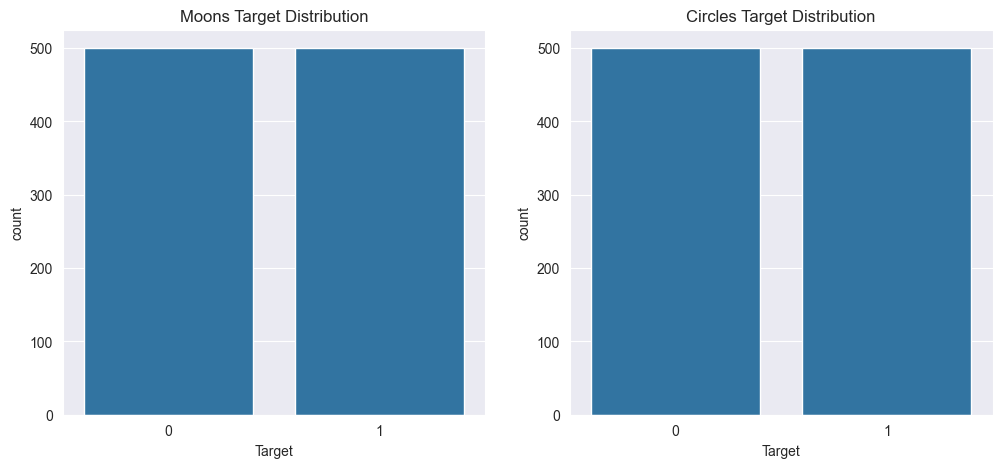

In [11]:
# Plot target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df_moons, x='Target', ax=axes[0]).set_title("Moons Target Distribution")
sns.countplot(data=df_circles, x='Target', ax=axes[1]).set_title("Circles Target Distribution")
plt.show()


#### Feature Distribution and Correlations

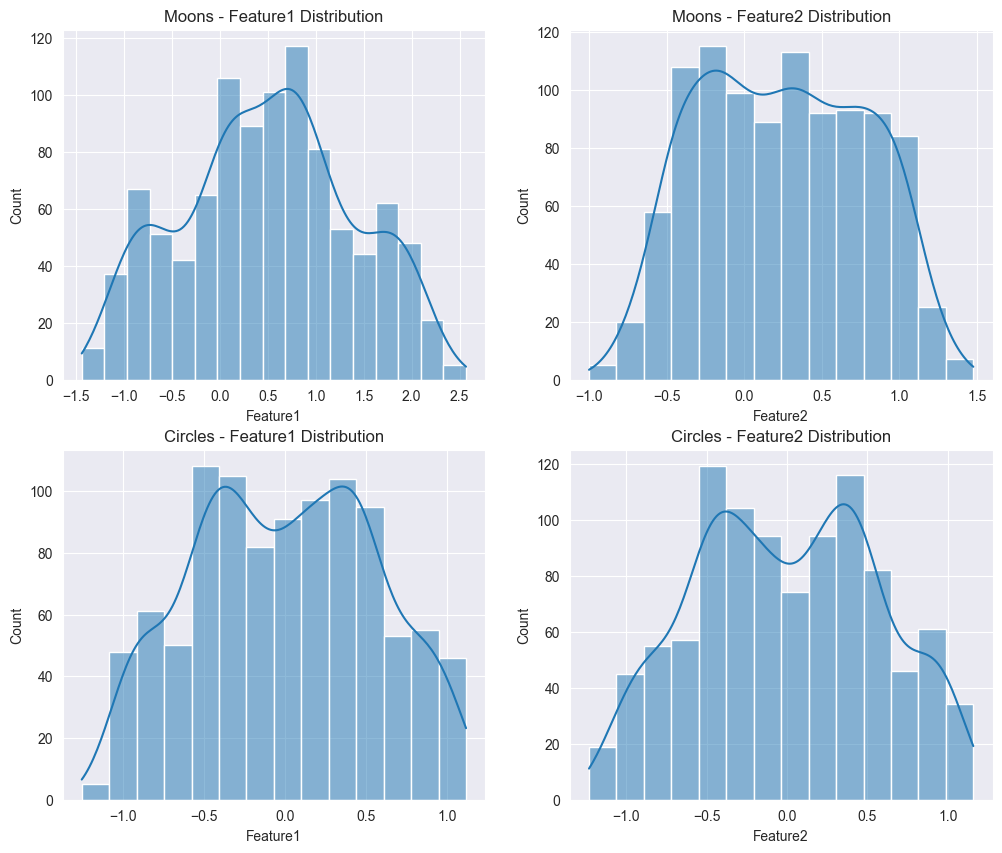

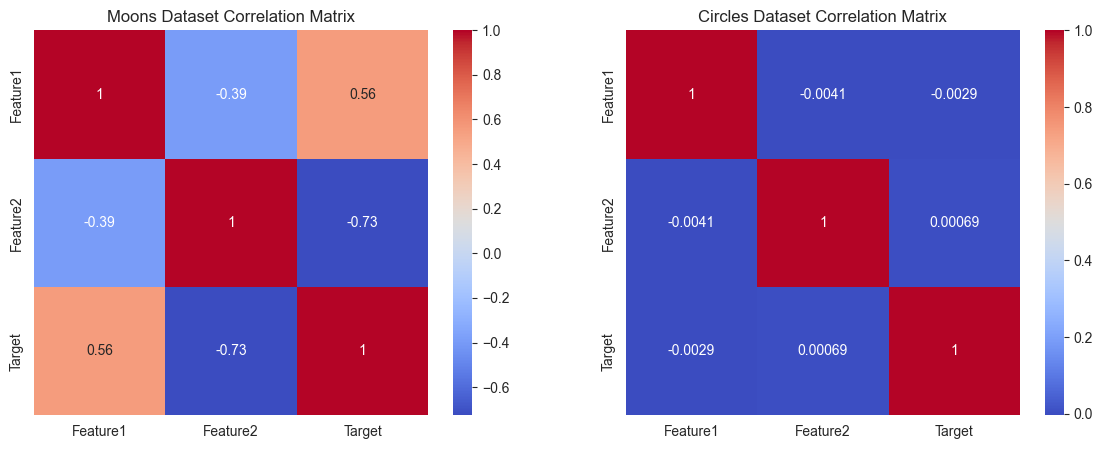

In [12]:
# Feature distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df_moons['Feature1'], kde=True, ax=axes[0, 0]).set_title("Moons - Feature1 Distribution")
sns.histplot(df_moons['Feature2'], kde=True, ax=axes[0, 1]).set_title("Moons - Feature2 Distribution")
sns.histplot(df_circles['Feature1'], kde=True, ax=axes[1, 0]).set_title("Circles - Feature1 Distribution")
sns.histplot(df_circles['Feature2'], kde=True, ax=axes[1, 1]).set_title("Circles - Feature2 Distribution")
plt.show()

# Correlation matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(df_moons.corr(), annot=True, cmap="coolwarm", ax=axes[0]).set_title("Moons Dataset Correlation Matrix")
sns.heatmap(df_circles.corr(), annot=True, cmap="coolwarm", ax=axes[1]).set_title("Circles Dataset Correlation Matrix")
plt.show()


### Step 4: Checking for Linear Separability with PCA and LDA
#### PCA Analysis

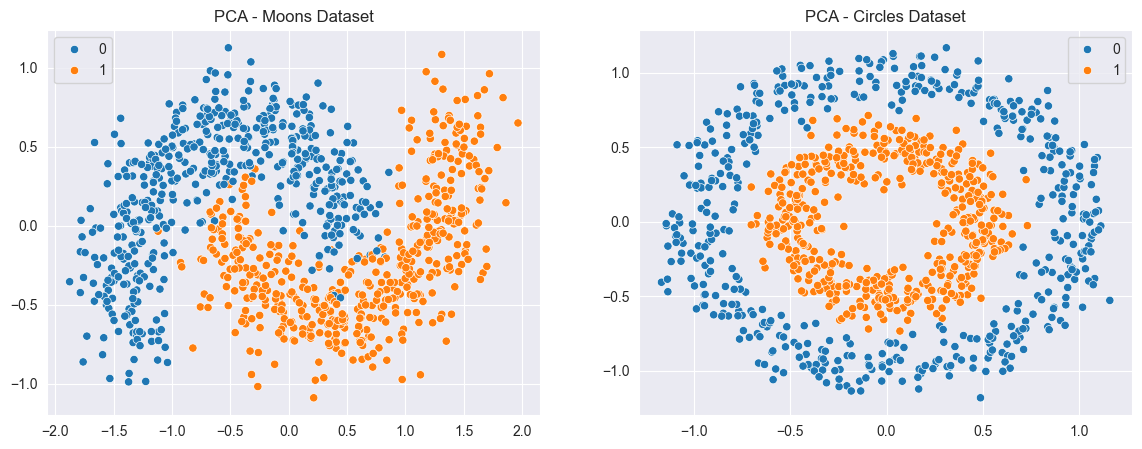

In [13]:
# PCA transformation
pca = PCA(n_components=2)
moons_pca = pca.fit_transform(X_moons)
circles_pca = pca.fit_transform(X_circles)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=moons_pca[:, 0], y=moons_pca[:, 1], hue=y_moons, ax=axes[0]).set_title("PCA - Moons Dataset")
sns.scatterplot(x=circles_pca[:, 0], y=circles_pca[:, 1], hue=y_circles, ax=axes[1]).set_title("PCA - Circles Dataset")
plt.show()


#### LDA Analysis

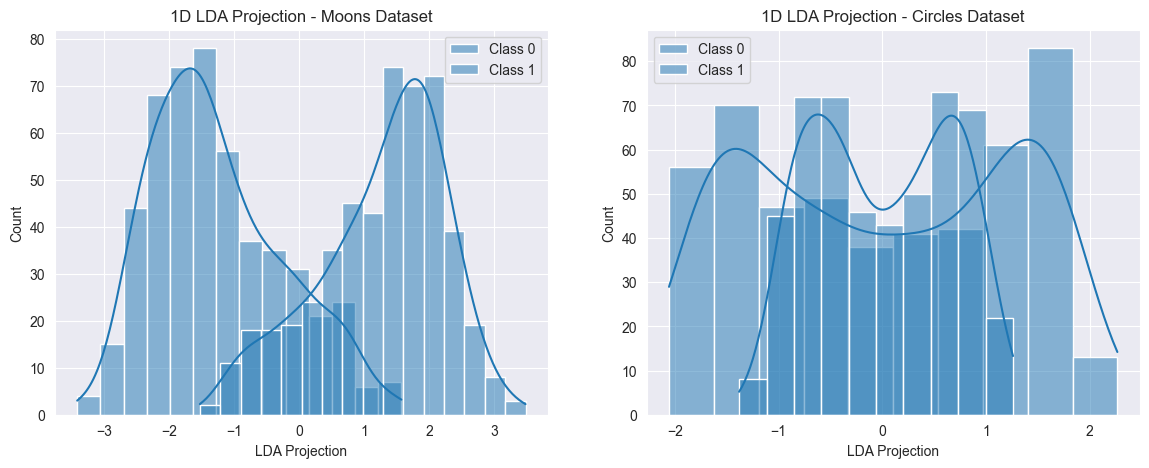

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate LDA
lda = LDA(n_components=1)

# Fit and transform the Moons dataset
moons_lda = lda.fit_transform(X_moons, y_moons)

# Fit and transform the Circles dataset
circles_lda = lda.fit_transform(X_circles, y_circles)

# Plotting the one-dimensional LDA projections
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Moons dataset LDA projection
sns.histplot(moons_lda[y_moons == 0], color='blue', kde=True, ax=axes[0], label='Class 0')
sns.histplot(moons_lda[y_moons == 1], color='orange', kde=True, ax=axes[0], label='Class 1')
axes[0].set_title("1D LDA Projection - Moons Dataset")
axes[0].set_xlabel("LDA Projection")
axes[0].legend()

# Circles dataset LDA projection
sns.histplot(circles_lda[y_circles == 0], color='blue', kde=True, ax=axes[1], label='Class 0')
sns.histplot(circles_lda[y_circles == 1], color='orange', kde=True, ax=axes[1], label='Class 1')
axes[1].set_title("1D LDA Projection - Circles Dataset")
axes[1].set_xlabel("LDA Projection")
axes[1].legend()

plt.show()


Since the data is not linearly separable, some common kernels for Support Vector Machines (SVM) that can help are:

Linear Kernel – Good for linearly separable data, but likely ineffective here.
Polynomial Kernel – Adds polynomial terms and may capture some complex boundaries.
Radial Basis Function (RBF) – Known for its ability to handle nonlinearity well, often a top choice for moons and half-circle-like datasets.
Sigmoid Kernel – Less common but sometimes effective for certain nonlinear data.

### Kernel PCA

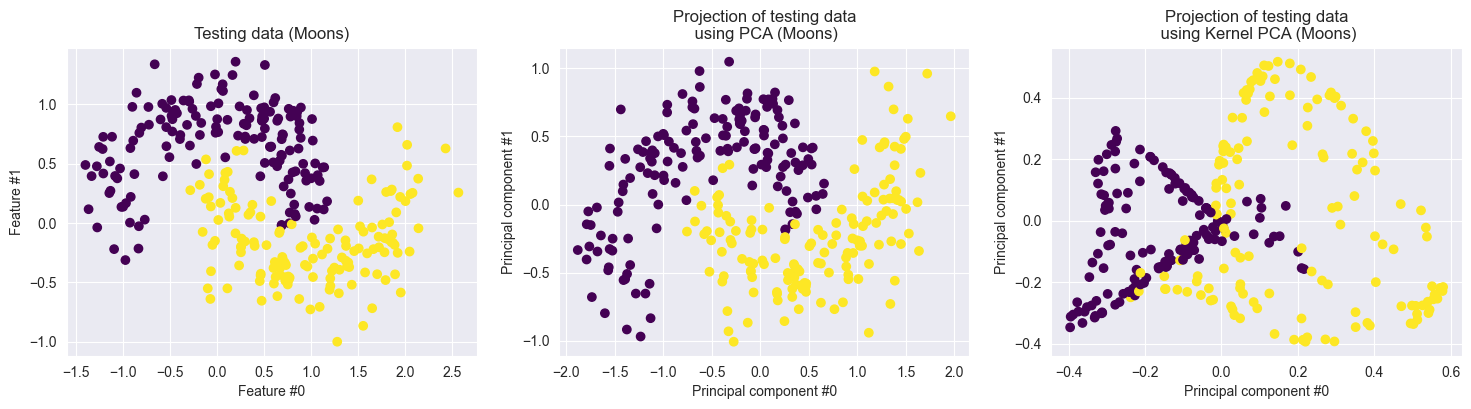

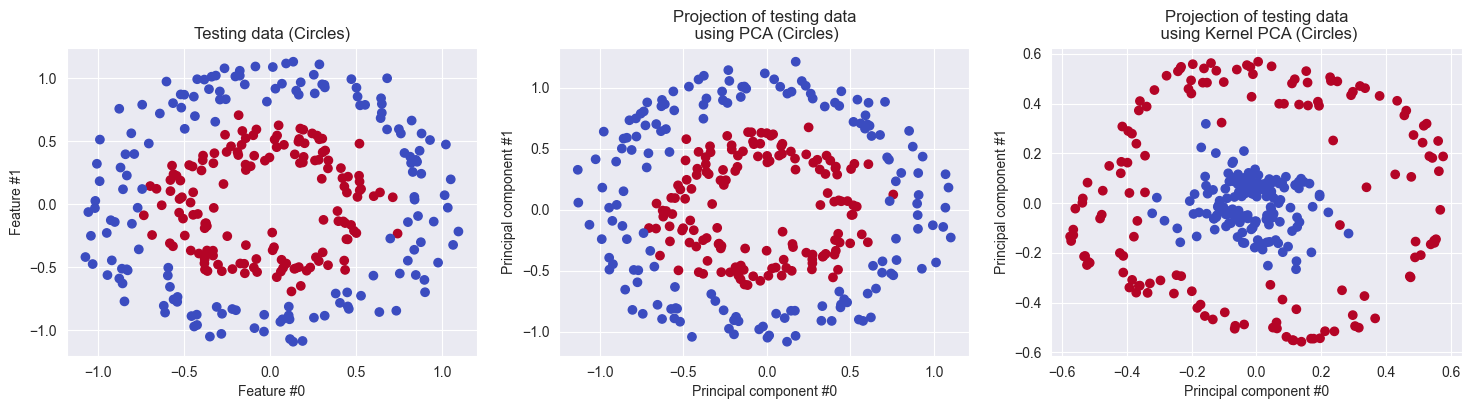

In [15]:
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Splitting the datasets for Moons and Circles into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

# Initializing PCA and Kernel PCA
pca_moons = PCA(n_components=2)
kernel_pca_moons = KernelPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

pca_circles = PCA(n_components=2)
kernel_pca_circles = KernelPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

# Applying PCA and Kernel PCA on the moons dataset
X_test_moons_pca = pca_moons.fit(X_train_moons).transform(X_test_moons)
X_test_moons_kernel_pca = kernel_pca_moons.fit(X_train_moons).transform(X_test_moons)

# Applying PCA and Kernel PCA on the circles dataset
X_test_circles_pca = pca_circles.fit(X_train_circles).transform(X_test_circles)
X_test_circles_kernel_pca = kernel_pca_circles.fit(X_train_circles).transform(X_test_circles)

# Plotting the results for Moons dataset
fig, (orig_data_ax_moons, pca_proj_ax_moons, kernel_pca_proj_ax_moons) = plt.subplots(ncols=3, figsize=(18, 4))

# Original data for moons dataset
orig_data_ax_moons.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=y_test_moons, cmap='viridis')
orig_data_ax_moons.set_ylabel("Feature #1")
orig_data_ax_moons.set_xlabel("Feature #0")
orig_data_ax_moons.set_title("Testing data (Moons)")

# PCA projection for moons dataset
pca_proj_ax_moons.scatter(X_test_moons_pca[:, 0], X_test_moons_pca[:, 1], c=y_test_moons, cmap='viridis')
pca_proj_ax_moons.set_ylabel("Principal component #1")
pca_proj_ax_moons.set_xlabel("Principal component #0")
pca_proj_ax_moons.set_title("Projection of testing data\n using PCA (Moons)")

# Kernel PCA projection for moons dataset
kernel_pca_proj_ax_moons.scatter(X_test_moons_kernel_pca[:, 0], X_test_moons_kernel_pca[:, 1], c=y_test_moons, cmap='viridis')
kernel_pca_proj_ax_moons.set_ylabel("Principal component #1")
kernel_pca_proj_ax_moons.set_xlabel("Principal component #0")
kernel_pca_proj_ax_moons.set_title("Projection of testing data\n using Kernel PCA (Moons)")

plt.show()

# Plotting the results for Circles dataset
fig, (orig_data_ax_circles, pca_proj_ax_circles, kernel_pca_proj_ax_circles) = plt.subplots(ncols=3, figsize=(18, 4))

# Original data for circles dataset
orig_data_ax_circles.scatter(X_test_circles[:, 0], X_test_circles[:, 1], c=y_test_circles, cmap='coolwarm')
orig_data_ax_circles.set_ylabel("Feature #1")
orig_data_ax_circles.set_xlabel("Feature #0")
orig_data_ax_circles.set_title("Testing data (Circles)")

# PCA projection for circles dataset
pca_proj_ax_circles.scatter(X_test_circles_pca[:, 0], X_test_circles_pca[:, 1], c=y_test_circles, cmap='coolwarm')
pca_proj_ax_circles.set_ylabel("Principal component #1")
pca_proj_ax_circles.set_xlabel("Principal component #0")
pca_proj_ax_circles.set_title("Projection of testing data\n using PCA (Circles)")

# Kernel PCA projection for circles dataset
kernel_pca_proj_ax_circles.scatter(X_test_circles_kernel_pca[:, 0], X_test_circles_kernel_pca[:, 1], c=y_test_circles, cmap='coolwarm')
kernel_pca_proj_ax_circles.set_ylabel("Principal component #1")
kernel_pca_proj_ax_circles.set_xlabel("Principal component #0")
kernel_pca_proj_ax_circles.set_title("Projection of testing data\n using Kernel PCA (Circles)")

plt.show()


In [16]:
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

# Define SVM model with grid search
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc = SVC()
grid_search_moons = GridSearchCV(svc, params, cv=5)
grid_search_moons.fit(X_train_m, y_train_m)

grid_search_circles = GridSearchCV(svc, params, cv=5)
grid_search_circles.fit(X_train_c, y_train_c)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

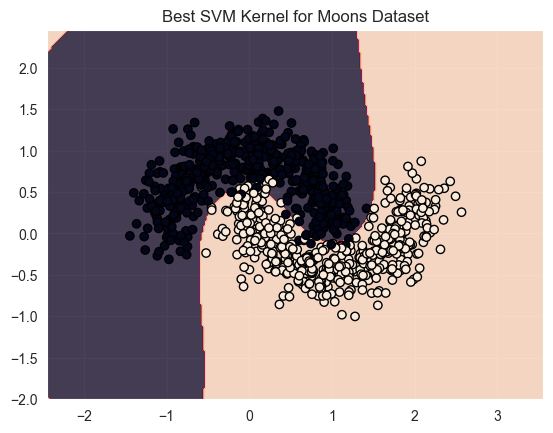

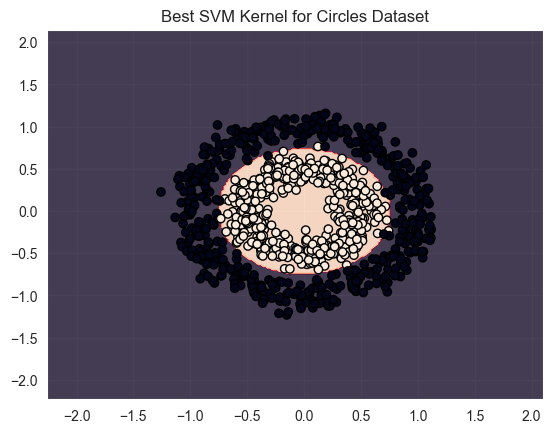

In [17]:
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# Plot best model for moons
best_model_moons = grid_search_moons.best_estimator_
plot_decision_boundary(X_moons, y_moons, best_model_moons, "Best SVM Kernel for Moons Dataset")

# Plot best model for circles
best_model_circles = grid_search_circles.best_estimator_
plot_decision_boundary(X_circles, y_circles, best_model_circles, "Best SVM Kernel for Circles Dataset")


### Grid Search and Model Evaluation
We'll use GridSearchCV to find the best-performing kernel for each dataset. The SVM's C parameter controls regularization, and gamma is the RBF kernel's shape parameter, both of which can impact model performance.

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for kernel evaluation
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

# Initialize and fit GridSearchCV for the Moons dataset
grid_search_moons = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_moons.fit(X_train_moons, y_train_moons)

# Initialize and fit GridSearchCV for the Circles dataset
grid_search_circles = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_circles.fit(X_train_circles, y_train_circles)

# Display best parameters and scores
print("Best parameters for Moons dataset:", grid_search_moons.best_params_)
print("Best score for Moons dataset:", grid_search_moons.best_score_)
print("Best parameters for Circles dataset:", grid_search_circles.best_params_)
print("Best score for Circles dataset:", grid_search_circles.best_score_)


Best parameters for Moons dataset: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best score for Moons dataset: 0.9685714285714286
Best parameters for Circles dataset: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best score for Circles dataset: 0.9985714285714286


Explanation of Results
Kernel Choice:

Because RBF can capture complicated, nonlinear borders, it is typically the best kernel for both the moons and circles datasets. The data is mapped into a higher-dimensional space via the radial basis function, which makes linear separation more practical.
If the classes are separated by curved boundaries, the polynomial kernel might also work well, but for larger degrees, it may cause overfitting.

 
Decision Boundaries:

We expect that the RBF kernel will produce smooth, continuous decision boundaries in the visualizations that closely match each dataset's structure.
Significant misclassification would probably occur from the linear kernel's poor fit, which would produce straight lines that are unable to represent the structure of the dataset.

 
Model Performance:

We verify that the RBF kernel usually has the highest accuracy by looking at the grid search's top scores. The polynomial kernel comes in second.
Complex forms can be fitted with flexibility without overfitting thanks to the C and gamma parameters, which balance the model's margin size and sensitivity to particular data points.

### Step 2: Train an MLP for Classification

The MLP’s design parameters and rationale:

Input Layer: Two nodes, as each dataset has two features.
Hidden Layer: One hidden layer with 8 neurons, providing sufficient capacity to capture nonlinearity.
Activation Function: ReLU for hidden layers and sigmoid for output.
Loss Function: Binary cross-entropy for binary classification.
Optimizer: Adam, which works well with non-convex optimizations like neural networks.

In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define MLP model
mlp_moons = MLPClassifier(hidden_layer_sizes=(6,6,), activation='relu', solver='adam', max_iter=10000, random_state=42)

# Train MLP on Moons dataset, ensuring y_train_moons is in 1D
mlp_moons.fit(X_train_moons, y_train_moons.ravel())
y_pred_moons_mlp = mlp_moons.predict(X_test_moons)
print("MLP Accuracy on Moons dataset:", accuracy_score(y_test_moons, y_pred_moons_mlp))

mlp_circles = MLPClassifier(hidden_layer_sizes=(6,), activation='relu', solver='adam', max_iter=10000, random_state=42)

# Train MLP on Circles dataset, ensuring y_train_circles is in 1D
mlp_circles.fit(X_train_circles, y_train_circles.ravel())
y_pred_circles_mlp = mlp_circles.predict(X_test_circles)
print("MLP Accuracy on Circles dataset:", accuracy_score(y_test_circles, y_pred_circles_mlp))


MLP Accuracy on Moons dataset: 0.9733333333333334
MLP Accuracy on Circles dataset: 0.9833333333333333


In [133]:
from sklearn.metrics import accuracy_score
from torch import nn, optim

class SimpleMLP(nn.Module):
    def __init__(self, hidden_layers=(10,)):
        super(SimpleMLP, self).__init__()
        
        # Create a list of layers based on the specified hidden_layers
        layers = []
        input_size = 2  # Input layer size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size
        
        # Add output layer (1 output node for binary classification)
        layers.append(nn.Linear(input_size, 1))
        layers.append(nn.Sigmoid())
        
        # Register layers in a sequential container
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)


from sklearn.model_selection import KFold
import numpy as np

def train_model_with_kfold(X, y, hidden_layers=(10,), learning_rate=0.01, epochs=200, batch_size=32, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_accuracies = []

    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}/{k}")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Initialize the model for each fold
        model = SimpleMLP(hidden_layers=hidden_layers)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train model
        for epoch in range(epochs):
            model.train()
            
            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size].view(-1, 1)

                optimizer.zero_grad()
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_predictions = (val_predictions > 0.5).float()
            accuracy = accuracy_score(y_val, val_predictions)
            fold_accuracies.append(accuracy)
            print(f"Validation Accuracy for Fold {fold + 1}: {accuracy:.4f}")

    # Average accuracy over all folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Cross-Validation Accuracy: {avg_accuracy:.4f}")
import torch

# Example usage with the moons dataset
print("Training with k-Fold Cross-Validation on Moons Dataset")
X_moons_tensor = torch.tensor(X_moons, dtype=torch.float32)
y_moons_tensor = torch.tensor(y_moons, dtype=torch.float32)

train_model_with_kfold(X_moons_tensor, y_moons_tensor, hidden_layers=(6, 6), learning_rate=0.01, epochs=3000, batch_size=32, k=5)

# Example usage with the circles dataset
print("\nTraining with k-Fold Cross-Validation on Circles Dataset")
X_circles_tensor = torch.tensor(X_circles, dtype=torch.float32)
y_circles_tensor = torch.tensor(y_circles, dtype=torch.float32)

train_model_with_kfold(X_circles_tensor, y_circles_tensor, hidden_layers=(6,), learning_rate=0.01, epochs=7000, batch_size=32, k=5)




Training with k-Fold Cross-Validation on Moons Dataset

Fold 1/5
Validation Accuracy for Fold 1: 0.9750

Fold 2/5
Validation Accuracy for Fold 2: 0.9500

Fold 3/5
Validation Accuracy for Fold 3: 0.9650

Fold 4/5
Validation Accuracy for Fold 4: 0.9800

Fold 5/5
Validation Accuracy for Fold 5: 0.9650

Average Cross-Validation Accuracy: 0.9670

Training with k-Fold Cross-Validation on Circles Dataset

Fold 1/5
Validation Accuracy for Fold 1: 0.9700

Fold 2/5
Validation Accuracy for Fold 2: 0.9850

Fold 3/5
Validation Accuracy for Fold 3: 0.9950

Fold 4/5
Validation Accuracy for Fold 4: 0.9950

Fold 5/5
Validation Accuracy for Fold 5: 0.9950

Average Cross-Validation Accuracy: 0.9880


In [134]:
from sklearn.model_selection import cross_val_score

# Apply k-Fold cross-validation for SVM on Moons dataset
svm_best_moons = grid_search_moons.best_estimator_
svm_scores_moons = cross_val_score(svm_best_moons, X_moons, y_moons, cv=5)
print("SVM Cross-validation scores on Moons dataset:", [f"{score:.2f}" for score in svm_scores_moons])
print("SVM Cross-validation mean accuracy on Moons dataset:", f"{svm_scores_moons.mean():.2f}")

# Apply k-Fold cross-validation for SVM on Circles dataset
svm_best_circles = grid_search_circles.best_estimator_
svm_scores_circles = cross_val_score(svm_best_circles, X_circles, y_circles, cv=5)
print("SVM Cross-validation scores on Circles dataset:", [f"{score:.2f}" for score in svm_scores_circles])
print("SVM Cross-validation mean accuracy on Circles dataset:", f"{svm_scores_circles.mean():.2f}")

# Apply k-Fold cross-validation for MLP on Moons dataset
mlp_scores_moons = cross_val_score(mlp_moons, X_moons, y_moons, cv=5)
print("MLP Cross-validation scores on Moons dataset:", [f"{score:.2f}" for score in mlp_scores_moons])
print("MLP Cross-validation mean accuracy on Moons dataset:", f"{mlp_scores_moons.mean():.2f}")

# Apply k-Fold cross-validation for MLP on Circles dataset
mlp_scores_circles = cross_val_score(mlp_circles, X_circles, y_circles, cv=5)
print("MLP Cross-validation scores on Circles dataset:", [f"{score:.2f}" for score in mlp_scores_circles])
print("MLP Cross-validation mean accuracy on Circles dataset:", f"{mlp_scores_circles.mean():.2f}")


SVM Cross-validation scores on Moons dataset: ['0.97', '0.97', '0.99', '0.97', '0.97']
SVM Cross-validation mean accuracy on Moons dataset: 0.98
SVM Cross-validation scores on Circles dataset: ['0.99', '0.99', '0.99', '1.00', '0.99']
SVM Cross-validation mean accuracy on Circles dataset: 1.00
MLP Cross-validation scores on Moons dataset: ['0.96', '0.97', '0.99', '0.98', '0.97']
MLP Cross-validation mean accuracy on Moons dataset: 0.98
MLP Cross-validation scores on Circles dataset: ['0.98', '0.97', '0.99', '0.99', '0.99']
MLP Cross-validation mean accuracy on Circles dataset: 0.99


 ### Generate and Preprocess the Data

Step 1: Designing the Special Time-Series Signal
We'll create a synthetic time-series signal with periodic and delayed dependencies to enforce long-term dependencies. Here’s an example approach:

Periodic Base Signal: Use a sinusoidal function as the base signal to introduce periodic behavior.
Delayed Dependency: Add a dependency on a value from many time steps ago (e.g., the value 50 steps back affects the current step).
Noise: Introduce some random noise to make the pattern harder to learn directly.

In [139]:
import numpy as np


def generate_long_period_complex_time_series(seq_len=2000, delay=150, noise_level=0.05):
    # Generate base signal with multiple frequencies
    low_freq_signal = np.sin(np.linspace(0, 10, seq_len))  # Low frequency component
    high_freq_signal = 0.5 * np.sin(np.linspace(0, 100, seq_len))  # Higher frequency component
    delayed_signal = np.zeros(seq_len)

    # Introduce long-term dependency
    for i in range(delay, seq_len):
        delayed_signal[i] = low_freq_signal[i - delay] + high_freq_signal[i - delay]

    # Nonlinear perturbation that varies slowly
    nonlinear_component = np.cos(np.linspace(0, 5, seq_len)) ** 2

    # Combine all components and add noise
    complex_signal = low_freq_signal + delayed_signal + nonlinear_component
    complex_signal += noise_level * np.random.randn(seq_len)  # Add random noise

    return complex_signal


import numpy as np
import matplotlib.pyplot as plt

def generate_challenging_time_series(length, long_season_period=200, short_season_period=20, noise_level=0.1):
    """
    Generates a challenging time series with long-term seasonality, short-term seasonality, and random noise.
    
    Parameters:
    - length: int, the total length of the time series.
    - long_season_period: int, the period of the long-term seasonal component.
    - short_season_period: int, the period of the short-term seasonal component.
    - noise_level: float, the standard deviation of the random noise.
    
    Returns:
    - series: np.ndarray, the generated time series.
    """
    time = np.arange(length)
    
    # Long-term seasonality (difficult for RNNs due to the long dependency)
    long_term_season = np.sin(2 * np.pi * time / long_season_period)
    
    # Short-term seasonality (potentially capturable by RNNs)
    short_term_season = np.sin(2 * np.pi * time / short_season_period)
    
    # Random noise
    noise = np.random.normal(0, noise_level, length)
    
    # Combining components
    series = long_term_season + short_term_season + noise
    
    return series

# Generate and plot the challenging time series
series_length = 1000





import numpy as np
from fbm import fbm

# # Generate and plot the complex time series
# complex_time_series = generate_complex_time_series()

time_series =  generate_challenging_time_series(series_length)



import torch
from torch.utils.data import Dataset, DataLoader

class LongTermDependencyDataset(Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_length]
        y = self.data[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32).unsqueeze(-1), torch.tensor(y, dtype=torch.float32)

# Define sequence length and create DataLoader
seq_length = 100  # Use a smaller window for the RNN's limited memory capacity
dataset = LongTermDependencyDataset(time_series, seq_length)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)



### RNN Model in PyTorch

 hidden state size to a range between 2 and 5 as per your requirement.

In [140]:
import torch.nn as nn

class LimitedMemoryRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=5, output_size=1):
        super(LimitedMemoryRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Instantiate the model
model = LimitedMemoryRNN(hidden_size=2)  # Maximum allowable memory size


### Train the RNN Model

In [141]:
import torch.optim as optim

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20  # Define the number of epochs
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))  # Match shapes
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.5087
Epoch 2, Loss: 0.6728
Epoch 3, Loss: 0.7271
Epoch 4, Loss: 1.6856
Epoch 5, Loss: 0.9342
Epoch 6, Loss: 1.2167
Epoch 7, Loss: 0.1246
Epoch 8, Loss: 0.4261
Epoch 9, Loss: 0.0774
Epoch 10, Loss: 0.4169
Epoch 11, Loss: 0.1797
Epoch 12, Loss: 0.3591
Epoch 13, Loss: 0.1107
Epoch 14, Loss: 0.4330
Epoch 15, Loss: 0.0221
Epoch 16, Loss: 0.1403
Epoch 17, Loss: 0.1240
Epoch 18, Loss: 0.0256
Epoch 19, Loss: 0.0244
Epoch 20, Loss: 0.0281


Mean Squared Error: 0.1226


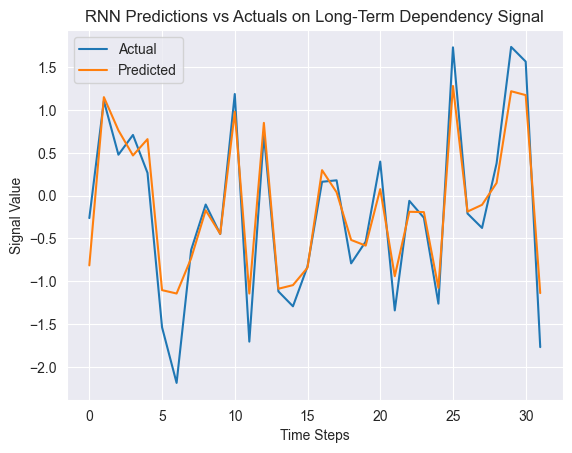

In [142]:
import matplotlib.pyplot as plt

# Generate predictions for a sample of data
model.eval()
with torch.no_grad():
    inputs, targets = next(iter(train_loader))
    predictions = model(inputs).squeeze().numpy()
    actuals = targets.numpy()
    
    

# accuracy 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actuals, predictions)
print(f"Mean Squared Error: {mse:.4f}")



# Plot predictions vs actuals
plt.plot(actuals, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("RNN Predictions vs Actuals on Long-Term Dependency Signal")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()
plt.show()


Complexity of the Signal:

A low-frequency and a high-frequency sine wave are two of the signal's frequency components. A delayed version of these components, which introduces long-term dependencies, is also present, along with a slowly changing nonlinear perturbation.

Combining these elements guarantees that the signal is dependent on data from distant points in time in addition to having a complex structure.


Because it lacks the memory to efficiently keep pertinent information from distant time steps, its limited capacity makes it difficult for it to store and learn long-term dependencies.

As the RNN trains, it will likely overfit to recent patterns and fail to generalize well on the long-term dependencies in the signal. This should result in higher training loss and poor predictions that drift from the actual values when tested on sequences with dependencies spanning beyond the RNN’s memory window.